In [442]:
import time
import sys
st = time.time()

import numpy as np
import matplotlib.pyplot as plt

!pip install quimb
import quimb
import quimb.tensor as qtn
from quimb import *

python(44800) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


# Tensor Networks

## Introduction 

In this laboratory, we will explore the Penrose Notation for Tensor Networks and applications of tensor networks to quantum information and classical simulation of quantum computing. 
The key learning objectives of this laboratory is for students (1) practice some basic coding skills and (2) apply idea's of tensor networks to questions of quantum information and classical simuability of quantum computers. We will be using the quimb tensor network package to visualize and explore tensor networks.

## Outline
1. Penrose Notation and Tensor Networks
    - A. [Introduction](##1.a.-introduction)

    - B. [Basic Operations](##1.b.-basic-operations)
2. Probability States and Tensor Networks
    - A. [Matrix Product States](#2a-matrix-product-states)
    - B. [Matrix Product Operators](#2b-matrix-product-operators)
    - C. [Extracting Info](#2c-extracting-info)
3. [Bond Dimension and Simuability](#3-bond-dimension-and-simuability)

## 1. Penrose Notation and Tensor Networks

## 1.A. Introduction



Throughout this Lab we will be using what is known as penrose notation. This will simplify if not obscufate the notation of the extensive matrix contractions that we will be doing. The basic idea illustrated in the figure below. We see that a Scalar, $\alpha\in\mathcal(C)$, is written as simply a circle with no lines. A vector, $\vec v \in \mathcal(C)^n$, is written as a ball with one line attached. A two component tensor (matrix) $A\in \mathcal(C)^n \times \mathcal(C)^n$ is written as a ball with two lines. This continues for tensors with as many compenents as we can possibly need.

<!---![Penrose Notation](img/Penrose_notation.png)--->


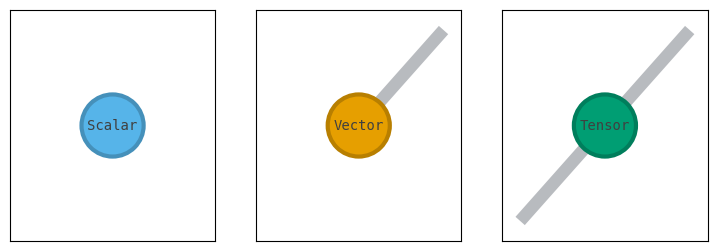

In [70]:
ta = qtn.rand_tensor([], inds=[], tags='Scalar')
tb = qtn.rand_tensor([500,1], inds=['',' '], tags='Vector')
tc = qtn.rand_tensor([500, 500], inds=[' ', '  '], tags='Tensor')

fig, axs = plt.subplots(1, 3,figsize=(9,3))
fix = {
    'Scalar': (0.5, 0.5),
    'Vector': (0.5, 0.5),
    'Tensor': (0.5, 0.5),
}
for i, ta in enumerate([ta,tb,tc]):
    t=ta
    t.draw(
        ['Scalar', 'Vector', 'Tensor'],
        ax=axs[i],
        node_scale=2,
        legend=False,
        fix=fix
    )



- _Exercise 1:_
    - _Write the following four component tensor in Tensor Network notation $A^{i,j}_{m,n}$:_
    
    <!---$$\sum_{a_1,a_2,a_3} A^{s_1}_{a_1} B^{s_2}_{a_1,a_2} C^{s_3}_{a_2,a_3} D^{s_4}_{a_3}$$--->

<!---![Penrose Notation](img/ex1.png)--->

Matrix operations are done by simply adding, removing, moving, connecting lines lines for example as simple matrix contraction is done by connecting a line from a matrix. For example a matrix acting on a vector is written as:

<!---![Penrose Notation](img/examp1.png)--->


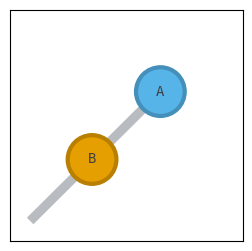

In [69]:
ta = qtn.rand_tensor([100,1], inds=["a"," "], tags='A')
tb = qtn.rand_tensor([100,100], inds=["a",'   '], tags='B')

tn=(ta&tb)
fig, axs = plt.subplots(1, 1,figsize=(3,3))
tn.draw(
        ['A', 'B'],
        ax=axs,
        node_scale=2,
        legend=False,
    )


- _Exercise 2:_
    - _Write the following contraction in Tensor Network notation: 
    $$\sum_{i,j,k,l,n} A_{i,j}B_{i,k,l}C_{l,n}D_{j,k,n}$$
    
     and what is the rank of the result?:


![Penrose Notation](img/simple_penrose.png)

- _Exercise 3:_ Using the previous network in which all index dimensions are 3 dimensional indexed from zero and the definitions
        
    - $A_{i,j} = j^2 - 2i$
    - $B_{i,k,l} = -(3^i) k + l$
    - $C_{l,n} = n$
    - $D_{j,k,n} = jkn$
        
   Write a nested for loop to compute the contraction of the tensor netwrk

In [2]:
s=0
for i in range(3):
    for j in range(3):
        for l in range(3):
            for n in range(3):
                for k in range(3):
                    s =s + (j**2 - 2*i)*(-(3)**i *k+l)*j*k*n**2
print(s)

1080


Using the previous example will see how to build tensor networks explicitly though the quimb package. 

1080

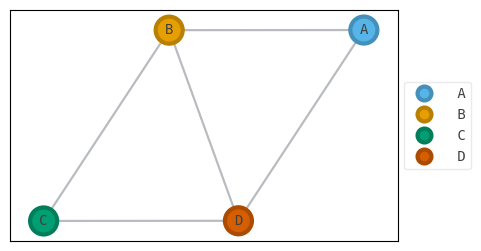

In [73]:

# First set up data and index labels for all the tensors
dims = [0,1,2]
a_dat = [[y*y-2*x for x in dims] for y in dims]
a_inds = ('j', 'i')
b_dat = [[[-3**(x)*y+z for x in dims]for y in dims] for z in dims]
b_inds = ('l', 'k','i')
c_dat = [[y for x in dims] for y in dims]
c_inds = ('n', 'l')
d_dat = [[[x*y*z for x in dims]for y in dims] for z in dims]
d_inds = ('n', 'k','j')

# Construct the individual tensors
A = qtn.Tensor(data=a_dat, inds=a_inds, tags="A")
B = qtn.Tensor(data=b_dat, inds=b_inds, tags="B")
C = qtn.Tensor(data=c_dat, inds=c_inds, tags="C")
D = qtn.Tensor(data=d_dat, inds=d_inds, tags="D")

# this is short hand to combine the tensors with the respective indicies 
TN = A & B & C & D

# For illistration we will draw our tensor network and preform the same contraction as our for loop
fig, axs = plt.subplots(1, 1,figsize=(5,3))
TN.draw(color=['A', 'B', 'C', 'D'],ax=axs)
TN.contract()




## 1.B. Basic operations

The real power of Tensor Networks and Penrose Notation comes from the ability to represent and preform more complex matrix operations very simply we will go through and discuss few examples:

### Contraction 

We have already seen the most basic operation, contraction of two tensors along shared indicies.
- $O(\frac{Dim(A)Dim(B)}{Dim(A\cap B})$

[-0.31286413 -0.24085799 -0.22087179  0.07090623 -0.15854229 -0.02147676
 -0.11960896 -0.08437775 -0.1911375  -0.13976749  0.35886069 -0.18533698
  0.43059634  0.4849943  -0.1409413  -0.11752072  0.06576048  0.07289785
  0.2309548  -0.08235538]
0.9999999999999998


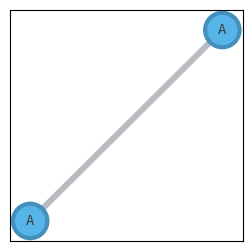

In [78]:
# Look at some random tensor
ta = qtn.rand_tensor([20], inds=['a'], tags='A')
# make sure its normalized
ta = ta / ta.norm()
#look at the data itself and compute the frobenius norm squared
TN = ta.H & ta
fig, axs = plt.subplots(1, 1,figsize=(3,3))
TN.draw(["A"],ax=axs,legend=False)

print(ta.data)
print(ta.H @ ta)


### Vector to Matrix Promotion, (Splitting an Index)

Another trick we can do is to split legs of a tensor or recombine them. This corresponds to splitting the index of a vector to create a two index object (i.e a matrix) or merging two indicies into one (vectorizing a matrix).

$| \psi\rangle = \begin{bmatrix}
           1 \\
           0 \\
           0 \\
           1
         \end{bmatrix}
         \rightleftharpoons
         \begin{bmatrix}
             1 & 0 \\
             0 & 1
         \end{bmatrix}
         = \frac{I}{\sqrt{2}}
         $

[[1 0]
 [0 1]]
[1 0 0 1]


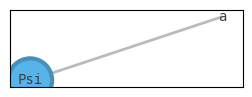

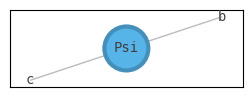

In [141]:
psi_data= [1,0,0,1]
psi_inds=['a']

# Create our tensor
Psi = qtn.Tensor(data=psi_data, inds=psi_inds, tags="Psi")
fig, axs = plt.subplots(1, 1,figsize=(3,1))
Psi.draw(["Psi"],ax=axs,legend=False)

#split the index of a
Psi1 = Psi.unfuse({"a":("b","c")},{"a":(2,2)})
print(Psi1.data)
fig, axs = plt.subplots(1, 1,figsize=(3,1))
Psi1.draw(["Psi"],ax=axs,legend=False)

#recombine the index to get the original Psi
Psi = Psi1.fuse({"a":("b","c")})
print(Psi.data)

### 
- _Exercise 4:_
    vectorize the four pauli matricies, what are the resulting vectors?

You get all the bell states

### Splitting Tensors

Another important operation that can be done is splitting tensors. There are a number of ways to do this but we will focus on a singular value decomposition.

WE will start with a 2 component tensor representing

$| y \rangle=\sum_{i_1,i_2}^{d^2} T^{i_1,i_2} | i_1,i_2\rangle$


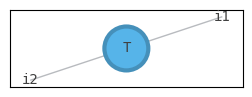

In [91]:
t = qtn.rand_tensor([2, 2], inds=["i1","i2"],tags="T")
fig, axs = plt.subplots(1, 1,figsize=(3,1))
t.draw(["T"],ax=axs,legend=False)

We then want to transform it to a tensor of:

$|y \rangle = \sum_{i_0}^{d^2}\sum_{\alpha_0}V[1]^{i_1}_{\alpha_0 }V[2]^{i_2}_{\alpha_0} |i_1...i_n\rangle$

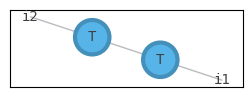

In [92]:
tn = t.split(["i1"],method='svd')
fig, axs = plt.subplots(1, 1,figsize=(3,1))
tn.draw(["T"],ax=axs,legend=False)

Now we have all the tools we need to start asking questions about probability states

## 2. Probability States and Tensor Networks

### 2.A Matrix Product States
We are interested in a classical simulation of quantum computation. As we know there the size of our quantum probability states grow exponentially with system size $O(d^N)$, this quickly becomes unfeasible to store in a classical computer's memory. Lets find a way to efficiently compress the amount of information we need to store a quantum probability state.

To do this we will follow a recipe

- We start with a probability state representing N subspaces with dimmension d, e.g. 5 qubits with subspace dimmension 2. 
- We then split the index of the probability vector until we have a rank N tensor. We end up with N indicies each will be of dimension d and each will correspond to a physical site
- We then preform an svd between all the indicies untill we are left with N rank 3 tensors (the first and last site will be rank 2)

This is done in the code below for a random probability state.
    


TensorNetwork(tensors=8, indices=15)

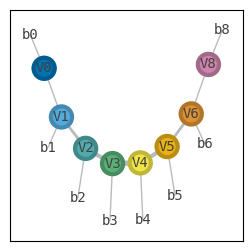

In [290]:
#size of MPS
N=8

#generate a random ket
Psi = qtn.rand_tensor([2**N], inds=["a"],tags="T")

#perform sequential index splitting
for i in range(N-1):
    Psi = Psi.unfuse({"a":("a",f"b{i}")},{"a":(2**(N-i-1),2)})
Psi = Psi.reindex({"a":(f"b{N}")})

#make a tensor network
TN=qtn.TensorNetwork([Psi])
#this will be used to collect the tensors we will use to make our mps
tensors = []

#Preform svd on the first vector
TN = tensor_split(TN.tensors[0],["b0"],ltags=[f"V{0}"],method="svd")
TN.tensors[0].tags.remove("T")
#remember this first tensor
tensors.append(TN.tensors[0])

# now svd the rest of the tensors
for i in range(1,N-1):
    TN = tensor_split(TN.tensors[1],[f"b{i}",tensors[i-1].inds[-1]],ltags=[f"V{i}"],method="svd")
    TN.tensors[0].tags.remove("T")
    tensors.append(TN.tensors[0])
tensors.append(TN.tensors[1].retag({"T":f"V{N}"}))

#collect all the individual tensors into one TN this is our mps
MPS = qtn.TensorNetwork(tensors)
fig, axs = plt.subplots(1, 1,figsize=(3,3))
MPS.draw([f'V{i}' for i in range(9)],ax=axs,legend=False)
MPS

The output of this code gives us a nice drawing of our mps of a random ket, and the MPS object. Click the arrow next to "TensorNetwork" inside are the individual tensors that make up our mps what do you notice about the size of the tensors?

The previous procedure will exactly represent any state. Aside from rearanging our matrix, we haven’t done anything particularly useful yet.

Now repeat this procedure but we will limit the maximum dimensions of our tensors by restricting the dimension of the size leg connecting two of our tensors. This is known as bond dimension restriction. (Another way to do this is to limit the maximum size of singular values to keep.)

TensorNetwork(tensors=8, indices=15)

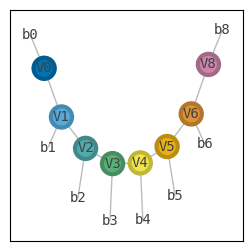

In [428]:
#size of MPS
N=8

#generate a random ket
Psi = qtn.rand_tensor([2**N], inds=["a"],tags="T")

#perform sequential index splitting
for i in range(N-1):
    Psi = Psi.unfuse({"a":("a",f"b{i}")},{"a":(2**(N-i-1),2)})
Psi = Psi.reindex({"a":(f"b{N}")})

#make a tensor network
TN=qtn.TensorNetwork([Psi])
#this will be used to collect the tensors we will use to make our mps
tensors = []

#Preform svd on the first vector                      #### Notice we are now limiting bond size####
TN = tensor_split(TN.tensors[0],["b0"],ltags=[f"V{0}"],method="svd",max_bond=2)
TN.tensors[0].tags.remove("T")
#remember this first tensor
tensors.append(TN.tensors[0])

# now svd and split the rest of the tensors
for i in range(1,N-1):
    TN = tensor_split(TN.tensors[1],[f"b{i}",tensors[i-1].inds[-1]],ltags=[f"V{i}"],method="svd",max_bond = 2)
    TN.tensors[0].tags.remove("T")
    tensors.append(TN.tensors[0])
tensors.append(TN.tensors[1].retag({"T":f"V{N}"}))

#collect all the individual tensors into one TN this is our mps
MPS = qtn.TensorNetwork(tensors)
fig, axs = plt.subplots(1, 1,figsize=(3,3))
MPS.draw([f'V{i}' for i in range(9)],ax=axs,legend=False)
MPS

Now look inside the TensorNetwork again, what do you notice about the size of the tensors?
Much smaller so we have restricted the number of parameters to store this ket.

    
This is done by throwing away the smallest singular values until we are left with our only how ever many we desire. You may ask what do we lose when we throw away singular values? Good question we will explore that soon.

The number of parameters we need in order to store an MPS is $O(N d \chi^2)$ where N is equal to number of sites, d is the dimension of a site (for a qubit d=2), and χ is equal to the maximum bond dimension. This now gives us linear scaling in system size $O(N)$ rather than the exponential $O(d^N)$ number of parameters to store the probability vector.

- _Exercise :_
    What is the bond dimension such that the MPS can arbitrarily represent any state?


By limiting bond dimension we limit the number of states we can represent exactly by a MPS with
fixed bond size, so what kind of states are well approximated by an MPS? Why are these more
efficient and when are they more efficient?
If we look at all of hilbert space, we can define subregions where an mps of a certain bond dimmension can exactly represent a probability state.
![hilbert](img/hilbert_space.png)

If we  define "efficiently representable" as increasing linearly in N then we see there is a large part of hilbert space that is not efficiently representable.



- _Exercise :_
    Describe the state given by the MPS whos only non-zero components are given in
    ![Penrose Notation](img/mystery_state.png)
    where left and right boundary conditions are the identity 

see code below

In [427]:
#code for mps formation
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
A = np.array([[[1,0],[0,1]],[[0,1],[1,0]]])

#initialize sites and MPS
MPS = qtn.MatrixProductState([I,A,I])
MPS.normalize()

MPS.to_dense()


array([[0.5],
       [0. ],
       [0. ],
       [0.5],
       [0. ],
       [0.5],
       [0.5],
       [0. ]])

thus we get a stat we an even number of ones.

### 2.B Matrix product operators


Now that we can represent a quantum probability state how can we preform operations on it?


We can, the object we create is known as a matrix product operator. Just as we broke down a probability state we can break down a operator using the same procedure, just being a little more carful with indicies.

$$M^{s_1 s_2 s_3 s_4 s_5 s_6}_{s'_1 s'_2 s'_3 s'_4 s'_5 s'_6}
= \sum_{\{\mathbf{\alpha}\}} A^{s_1 \alpha_1}_{s'_1} 
A^{s_2 \alpha_2}_{\alpha_1 s'_2}
A^{s_3 \alpha_3}_{\alpha_2 s'_3}
A^{s_4 \alpha_4}_{\alpha_3 s'_4}
A^{s_5 \alpha_5}_{\alpha_4 s'_5}
A^{s_6}_{\alpha_5 s'_6}$$

what is this in penrose notation?

For now we wont go into too much detail about these but we will see a few examples.

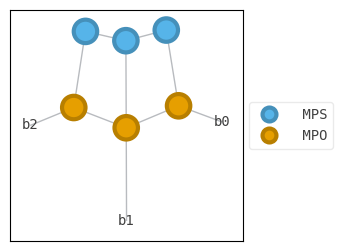

In [486]:
#Create a a MPS to operate on
Psi = qtn.MPS_rand_state(3,2,tags = "MPS")
#MPO that act as an identity on all qubits
Mpo = MPO_identity(3)
# random hermitian mpo
Mpo = MPO_rand_herm(3,2,tags="MPO")

TN = Psi&Mpo
# Psi.gate(Mpo,(0,1,2),inplace=True,contract='split-gate' )
fig, axs = plt.subplots(1, 1,figsize=(3,3))
TN.draw(["MPS","MPO"],ax=axs,show_tags=False )

We see the Mpo and how it acts on the mps if we contract along the vertical lines we end up with an mps again

we dont need to specify an entire mpo, we can also just create an mpo acting an a subsection of our system

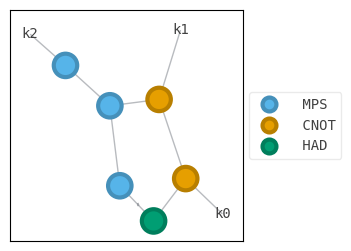

In [515]:
#Create a 3 qubit mps set to 000
Psi = qtn.MPS_rand_state(3,2,tags = "MPS")

Psi = Psi.gate(hadamard(),(0),tags = "HAD")

Psi = Psi.gate(CNOT(),(0,1),contract='split-gate',tags="CNOT")

# step1 = had @ dop
# end = pkron(CNOT(), [2] * 3, [0, 1]) @ step1
fig, axs = plt.subplots(1, 1,figsize=(3,3))
Psi.draw(["MPS","CNOT","HAD"],ax=axs,show_tags=False)

A bit more complex but we see that it again can be contracted down to an mps again

### Extracting Info

Quimb provides a number of methods that can easily extract quantities of interest from our MPS. For example from our last example we can measure the subsystem entropy

In [534]:
Psi = qtn.MPS_computational_state("000",tags="MPS")

#same as before but now we contract the operators as we act with them
Psi = Psi.gate(hadamard(),(0),contract="swap+split")

Psi = Psi.gate(CNOT(),(0,1),contract="swap+split")

Psi.entropy(1)

1.0


- Exercise : 
    - Numerically Show, numerically, that Haar random states are typically maximally entangled. You must generate Haar random unitary matrices over two tensor state spaces. Act this Haar random unitary on the state $\ket{00}$ to get a Haar random state. Then compute the entanglement entropy over the partition of the spaces. Repeat this procedure to generate expected values for the entanglement entropy and the Schmidt rank.


In [ ]:
Not sure if I should throw this in right here

## 3. Bond Dimension and Simuability


Text(0.5, 0, 'Coin Bias')

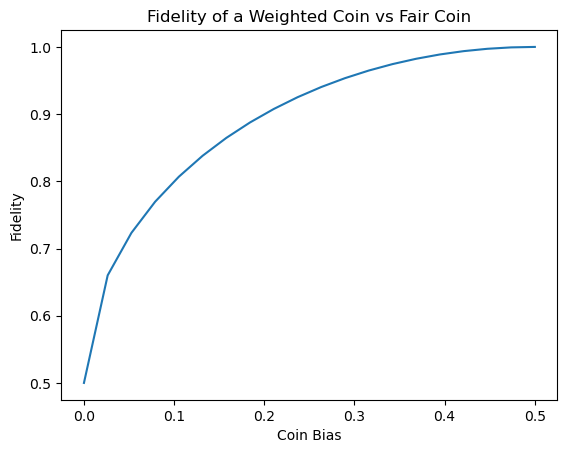

In [9]:
from quimb import *
from quimb.tensor import *


#%% coin flip fidelity
true = np.sqrt(np.array([[0.5],[0.5]]))
fidels = []
for j in np.linspace(0,0.5,20):
    fake = np.sqrt(np.array([[j],[1-j]]))
    fidels.append(fidelity(true,fake,squared=True))
plt.plot(np.linspace(0,0.5,20),fidels)
plt.title("Fidelity of a Weighted Coin vs Fair Coin")
plt.ylabel("Fidelity")
plt.xlabel("Coin Bias")

add some other correlations match other notebook

Full dim mps vs different bond dim limited

[[-0.492814+0.103292j]
 [-0.156429+0.297315j]
 [ 0.098156-0.045918j]
 [ 0.053894-0.239464j]
 [ 0.132255-0.243556j]
 [-0.244626+0.232341j]
 [ 0.211039+0.322448j]
 [ 0.447771-0.1482j  ]]

Text(0.5, 1.0, 'Fidelity vs Bond Dim')

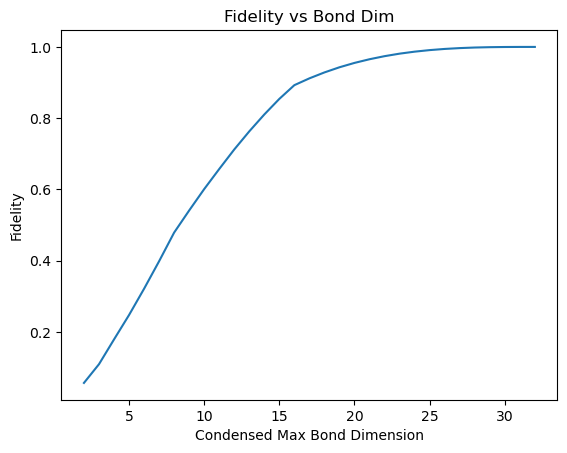

In [550]:
n = 10
fids = []

for trial in range(0,50):
    fids_trial=[]
    init = rand_ket(2**n)

    full = MatrixProductState.from_dense(init,[2]*n)
    
    bonds = range(32,1,-1)
    for max_bond in bonds:
        compressed = MatrixProductState.from_dense(init,[2]*n,max_bond=max_bond)
        fids_trial.append(fidelity(compressed.to_dense(),full.to_dense(),squared=True))
    fids.append(fids_trial)
plt.plot(bonds,np.mean(fids,axis=0))

plt.ylabel("Fidelity")
plt.xlabel("Condensed Max Bond Dimension")
plt.title("Fidelity vs Bond Dim")

In [10]:
# function that generates random MPOs acting on random sites of the MPS a "random circuit"
def generate_random_circuit(n_sites=10,n_gates=50):
    # the initial state
    cyclic = False
    n = n_sites
    psi = MPS_computational_state("1"+"0"*(n-1),cyclic=cyclic, tags='KET', dtype='complex128')    
    # the gates
    gates = [rand_uni(4) for _ in range(n_gates)]
    u_tags = [f'U{i}' for i in range(n_gates)]
    
    for U, t in zip(gates, u_tags):
        # generate a random coordinate
        i = np.random.randint(0, n - int(not cyclic))
        
        # apply the next gate to the coordinate
        #     propagate_tags='sites' (the default in fact) specifies that the
        #     new gate tensor should inherit the site tags from tensors it acts on
        psi.gate_(U, where=[i, i + 1], tags=t, propagate_tags='sites')
        
    return psi.to_dense()

#define number of sites
n =10
#generate one instance of a random circuit generated quantum probability vector
init = generate_random_circuit(n,100)

#create a mps that has full bond demension
full = MatrixProductState.from_dense(init,[2]*n)

#create a mps with a restricted bond dimension
compressed = MatrixProductState.from_dense(init,[2]*n,max_bond=2)

#calculate the fidelity between the full and compressed MPS
fidelity(compressed.to_dense(),full.to_dense(),squared=True)

0.1333872993212142

- _Exercise:_
    fill out the for loop to calculate and plot fidelity of a matrix product state with limited bond dimension vs a max bond dimension mps for a random circuit


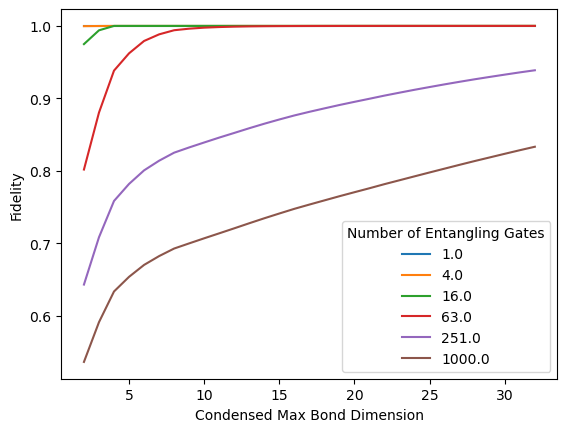

In [11]:
n = 15
fids = []
for j in np.linspace(0,3,6):
    for trial in range(0,10):
        fids_trial=[]
        init = generate_random_circuit(n,int(10**j))
        full = MatrixProductState.from_dense(init,[2]*n)
        
        bonds = range(32,1,-1)
        for max_bond in bonds:
            compressed = MatrixProductState.from_dense(init,[2]*n,max_bond=max_bond)
            fids_trial.append(fidelity(compressed.to_dense(),full.to_dense(),squared=True))
        fids.append(fids_trial)
    lab = np.round(10**j)
    plt.plot(bonds,np.mean(fids,axis=0),label=rf"{lab}")
plt.ylabel("Fidelity")
plt.xlabel("Condensed Max Bond Dimension")
plt.legend(title="Number of Entangling Gates")